<a href="https://colab.research.google.com/github/kurkur19/Intelligent_Data_Analysis_Al_Khmuz_BS_25/blob/main/%D0%9A%D0%9F_%E2%84%964_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%91%D0%A1_25_%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%86%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 4: Ієрархічна кластеризація
### Дисципліна: Вступ до Інтелектуального Аналізу Даних



Аль Хмуз Карина Бассамівна БС-25

##Завдання:

1.    Реалізувати ієрархічну кластеризацію у вигляді функції. В якості метрики відстані використовувати квадрат відстані Евкліда.
2.    Провести кластерний аналіз з використанням створеної функції.
3.    Функція має повертати матрицю відстаней для варіантів розділення на 1-30 кластерів.
4.    Побудувати графік базуючись на матриці відстаней для 1-10 кластерів. Проаналізувати за методом ліктя, зробити висновки про теоретичну оптимальну кількісті кластерів.

##Вхідні дані:
Я, Аль Хмуз Карина Бассамівна, маю перший варіант в своїй групі БС-25, тому:

1.	Вибір даних для кластеризації– 30 значень
2.	 Початок даних: 36
3.	Кінець даних: 65
4. Мій датасет для цієї роботи - "Діабет"

                  
    

##Вихідні дані:
-    Матриця класифікації
-    Внутрішньокластерна відстань для 2-10 кластерів(з виведенням на екран)
-    Матриця відстаней у вигляді таблиці для 1-30 кластерів (з виведенням на екран)
-    Побудувати графік базуючись на матриці відстаней для 1-10 кластерів, аналіз за методом ліктя
-    Висновок
                

##Вимоги:
•    теоретичні дані (до 1 ст.)

•    короткий опис алгоритму роботи даного виду кластеризації

•    набір даних, що був використаний

•    матрицю відстаней, графік

•    висновки про теоретичну оптимальну кількісті кластерів, базуючись на матриці відстані.

##Теоретичний матеріал:


***Кластеризація, або кластерний аналіз*** — це статистична процедура,
задача якої полягає в розбитті вибірки об'єктів на підмножини, що не
перетинаються і називаються кластерами. Кожен кластер має складається
зі схожих об'єктів, а об'єкти різних кластерів мають істотно відрізнятися
один від одного.

***Ієрархічні алгоритми кластеризації***, або алгоритми таксономії,
будують не одне розбиття вибірки на непересічні класи, а систему
вкладених розбиттів. Результат таксономії зазвичай представляється у
вигляді таксономічного дерева — дендрограми. Класичним прикладом
такого дерева є ієрархічна класифікація тварин і рослин.
Дендограми дозволяє уявити кластерну структуру у вигляді плаского
графіка незалежно від того, яка розмірність початкового простору. Існують
і інші способи візуалізації багатовимірних даних, такі як багатовимірне
шкалювання або карти Кохонена, але вони привносять в картину штучні
спотворення, вплив яких досить важко оцінити. Є два типи методів:
1. ***Агломератні методи:*** нові кластери утворюються шляхом
об'єднання дрібніших кластерів, і таким чином дерево створюється від
листя до стовбура.

2. ***Дивізійні методи:*** нові кластери створюються шляхом ділення
більших кластерів на більш дрібні, і таким чином дерево створюється від
стовбура до листя.
Подібність кластерів часто розраховується через «неподібність»,
наприклад, евклідова відстань між двома кластерами. Отже, чим більше
відстань між двома кластерами, тим краще. Ключовою операцією в
ієрархічній агломераційній кластеризації є неодноразове об'єднання двох
найближчих кластерів у один кластер, але дуже важливо спочатку
відповісти на три питання: як ви представити кластер з більш ніж однією
точкою, як визначити «близькість» кластерів та коли перестати поєднувати
кластери.
Алгоритми ієрархічної кластеризації припускають, що аналізована
множина об'єктів характеризується певним ступенем зв'язності. За
кількістю ознак іноді виділяють монотетічені та політетічні методи
класифікації. Як і більшість візуальних способів подання залежностей
графи швидко втрачають наочність при збільшенні числа кластерів.
Найчастіше використовуються агломеративні методи.
Злиття кластерів припиняється в залежності від доступної
інформації про дані, які ми маємо. Якщо групувати футболістів на полі на
основі їхніх позицій на полі, яке представлятиме їх координати для
розрахунку відстані між гравцями, очевидно, що треба зупинитися на
лише двох кластерах, оскільки можуть бути тільки дві команди, які грають
у футбольний матч.

##Практична частина:

###Імпорт бібліотек


In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

###Завантаження Excel-файлу у Google Colab

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Діабет.xlsx to Діабет.xlsx


###Читання файлу

In [5]:
data = pd.read_excel("Діабет.xlsx")

###Відбір та нормалізація даних

In [6]:
# Відбір рядків 36–65 та необхідних колонок
selected_data = data.loc[35:64, ['Гемоглобін', 'Вага', 'Протромбіновий час']]

# Нормалізація даних
scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_data)


У моєму датасеті було виявлено пропущені значення (NaN), які могли негативно вплинути на результати кластеризації. Для їх усунення я вирішила замінити пропущені значення середнім значенням відповідних стовпців.

In [8]:
# Перевірка на пропущені значення
print("Перевірка на пропущені значення:\n", pd.DataFrame(normalized_data).isnull().sum())

# Перевірка на нескінченні значення
print("Перевірка на нескінченні значення:", np.isinf(normalized_data).sum())

# Якщо є пропущені значення, можна замінити їх середнім значенням
if np.isnan(normalized_data).any():
    normalized_data = np.nan_to_num(normalized_data, nan=np.nanmean(normalized_data))

# Перевіримо ще раз, щоб упевнитися, що всі значення тепер коректні
print("Перевірка на пропущені значення після обробки:\n", pd.DataFrame(normalized_data).isnull().sum())
print("Перевірка на нескінченні значення після обробки:", np.isinf(normalized_data).sum())


Перевірка на пропущені значення:
 0    3
1    0
2    0
dtype: int64
Перевірка на нескінченні значення: 0
Перевірка на пропущені значення після обробки:
 0    0
1    0
2    0
dtype: int64
Перевірка на нескінченні значення після обробки: 0


Це означає, що у першій змінній (колонка 0) було 3 пропущені значення (NaN). У двох інших змінних (колонки 1 та 2) пропущених значень не було.

Після заміни пропущених значень середнім значенням відповідної колонки в усіх змінних тепер немає пропущених значень, можемо продовжити нашу роботу :)

###Функція ієрархічної кластеризації
Тепер реалізуємо ієрархічну кластеризацію, використовуючи квадрат Евклідової відстані.

In [9]:
from scipy.spatial.distance import pdist, squareform

# Створення матриці відстаней з квадратом Евклідової відстані
distance_matrix = squareform(pdist(normalized_data, metric='sqeuclidean'))

# Ієрархічна кластеризація
linkage_matrix = linkage(normalized_data, method='ward', metric='euclidean')


###Внутрішньокластерна відстань

In [22]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import squareform

# Збережемо відстані для 2–10 кластерів
internal_distances = []

# Обчислюємо внутрішньокластерні відстані для 2-10 кластерів
for num_clusters in range(2, 11):
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    distance_matrix = squareform(pdist(normalized_data))

    # Обчислюємо суму відстаней всередині кожного кластера
    total_internal_distance = 0
    for cluster in np.unique(clusters):
        cluster_points = normalized_data[clusters == cluster]
        if len(cluster_points) > 1:  # Щоб уникнути помилок для кластерів з 1 об'єктом
            total_internal_distance += np.sum(distance_matrix[np.ix_(clusters == cluster, clusters == cluster)])

    internal_distances.append(total_internal_distance)

# Виведемо результати на екран
for num_clusters, distance in zip(range(2, 11), internal_distances):
    print(f"Внутрішньокластерна відстань для {num_clusters} кластерів: {distance:.4f}")


Внутрішньокластерна відстань для 2 кластерів: 920.2985
Внутрішньокластерна відстань для 3 кластерів: 545.8267
Внутрішньокластерна відстань для 4 кластерів: 265.3262
Внутрішньокластерна відстань для 5 кластерів: 203.8537
Внутрішньокластерна відстань для 6 кластерів: 145.1834
Внутрішньокластерна відстань для 7 кластерів: 110.1981
Внутрішньокластерна відстань для 8 кластерів: 99.7194
Внутрішньокластерна відстань для 9 кластерів: 71.5609
Внутрішньокластерна відстань для 10 кластерів: 59.1449


Внутрішньокластерна відстань зменшується з ростом кількості кластерів, що свідчить про підвищення схожості об'єктів всередині кластерів. Це покращує якість кластеризації, адже менші відстані вказують на тісніше згуртування.

При переході від 2 до 10 кластерів спостерігається значне зменшення відстані, що підтверджує, що більша кількість кластерів краще відображає структуру даних. Оптимальна кількість кластерів, як правило, визначається в межах, де спостерігається різке зменшення внутрішньокластерної відстані, після чого це зменшення стає менш вираженим.









###Побудова дендрограми
Дендрограма дозволяє візуалізувати, як об'єднуються кластери на різних рівнях.

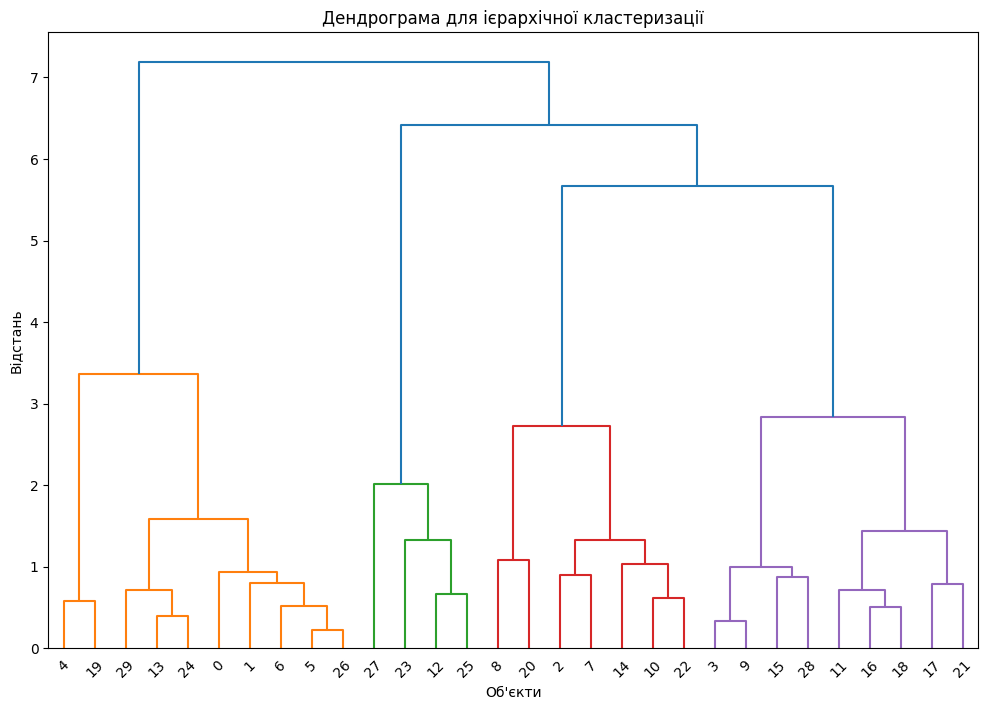

In [10]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title("Дендрограма для ієрархічної кластеризації")
plt.xlabel("Об'єкти")
plt.ylabel("Відстань")
plt.show()


Дендрограма для ієрархічної кластеризації ілюструє, як об'єкти в моєму датасеті об'єднуються в кластери. Спочатку всі об'єкти представлені єдиним кластером, що позначений синім кольором. Це свідчить про те, що відстань між усіма точками в даний момент є мінімальною. У міру збільшення відстані кластери починають розпадатися на менші групи, що представлено різними кольорами.

Кожен колір у дендрограмі символізує окремий кластер, який формується в результаті ієрархічної кластеризації. Чим вище на дендрограмі, тим більша відстань між кластерами, що вказує на те, що для об'єднання цих кластерів потрібно більше зусиль. Коли дендрограма дійде до кінцевої точки, ми можемо бачити, як об'єкти поділені на чотири різні кластери, що відображає їх близькість один до одного

###Аналіз методом ліктя

Метод ліктя використовує графік відстаней між кластерами, щоб оцінити, на якому етапі об’єднання найкраще припинити. Для цього розрахуємо матрицю відстаней для 1–10 кластерів.

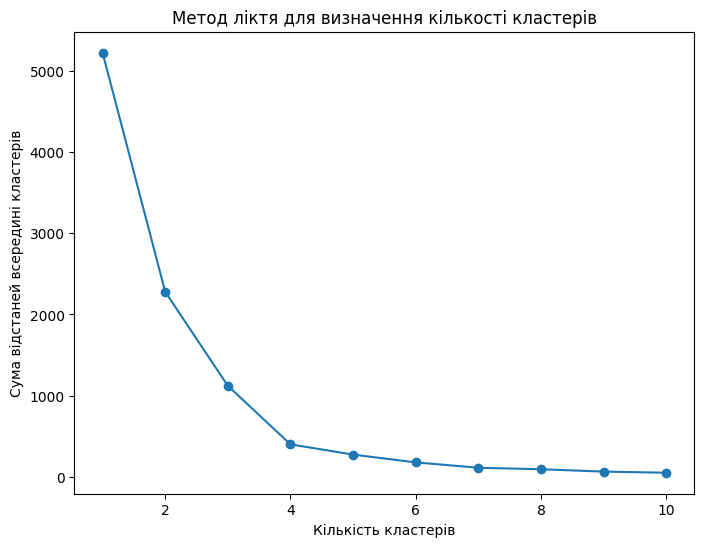

In [11]:
from scipy.cluster.hierarchy import fcluster

# Збережемо відстані для 1–10 кластерів
distance_sums = []
for num_clusters in range(1, 11):
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    # Визначення суми відстаней всередині кожного кластера
    sum_distance = np.sum([np.sum(distance_matrix[np.ix_(clusters == i, clusters == i)]) for i in np.unique(clusters)])
    distance_sums.append(sum_distance)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distance_sums, marker='o')
plt.title("Метод ліктя для визначення кількості кластерів")
plt.xlabel("Кількість кластерів")
plt.ylabel("Сума відстаней всередині кластерів")
plt.show()


На основі дендрограми та графіка методу ліктя ми можемо оцінити, яка кількість кластерів виглядає оптимальною. Зазвичай, оптимальна кількість кластерів знаходиться на тому місці, де відбувається різкий злам на графіку. У нашому випадку оптимальна кількість кластерів - 4.

###Матриця об’єднання

In [21]:
import pandas as pd
from scipy.cluster.hierarchy import linkage

# Виконати ієрархічну кластеризацію та створити linkage_matrix
linkage_matrix = linkage(normalized_data, method='ward')

# Ініціалізація списку для зберігання назв кластерів
cluster_names = [f"{i}" for i in range(len(normalized_data))]

# Побудова таблиці злиття кластерів
merge_table = []

for i in range(linkage_matrix.shape[0]):
    obj1 = int(linkage_matrix[i, 0])
    obj2 = int(linkage_matrix[i, 1])

    # Використовуємо оригінальні назви об'єктів або попередні назви кластерів
    name1 = cluster_names[obj1] if obj1 < len(cluster_names) else cluster_names[obj1 - len(normalized_data)]
    name2 = cluster_names[obj2] if obj2 < len(cluster_names) else cluster_names[obj2 - len(normalized_data)]

    # Додаємо новий рядок в таблицю злиття
    merge_table.append({
        "Об'єкт 1": name1,
        "Об'єкт 2": name2,
        "Відстань між кластерами": linkage_matrix[i, 2],
        "Нова назва": f"Cluster {i + 1}"
    })

    # Оновлюємо назву нового кластера
    cluster_names.append(f"Cluster {i + 1}")

# Перетворюємо список в DataFrame
merge_table_df = pd.DataFrame(merge_table)

# Виведення таблиці
print(merge_table_df)


      Об'єкт 1    Об'єкт 2  Відстань між кластерами  Нова назва
0            5          26                 0.222942   Cluster 1
1            3           9                 0.335087   Cluster 2
2           13          24                 0.400019   Cluster 3
3           16          18                 0.508559   Cluster 4
4            6   Cluster 1                 0.515596   Cluster 5
5            4          19                 0.577232   Cluster 6
6           10          22                 0.611266   Cluster 7
7           12          25                 0.671619   Cluster 8
8           11   Cluster 4                 0.713300   Cluster 9
9           29   Cluster 3                 0.718554  Cluster 10
10          17          21                 0.789855  Cluster 11
11           1   Cluster 5                 0.803709  Cluster 12
12          15          28                 0.869823  Cluster 13
13           2           7                 0.903954  Cluster 14
14           0  Cluster 12              

Матриця об'єднання, або таблиця злиття (merge table), є ключовим результатом ієрархічної кластеризації, що відображає процес об'єднання об'єктів у кластери.

Кожного разу, коли два об'єкти або кластери об'єднуються, створюється новий кластер, якому присвоюється нова назва, наприклад, "Cluster 1" або "Cluster 2". Ця назва слугує ідентифікатором для новоствореного кластера, свідчачи про те, що об'єкти тепер функціонують як одна група.

Математично, новий кластер можна розглядати як центр (або "центр ваги") об'єктів, що входять до його складу. У агломеративній кластеризації новий центр може обчислюватися, наприклад, як середнє значення координат усіх об'єктів кластера.

Таким чином, нова назва вказує на об'єднання об'єктів у спільний кластер, що відображає їх схожість.

Розглянемо перші кілька рядків матриці об'єднання:

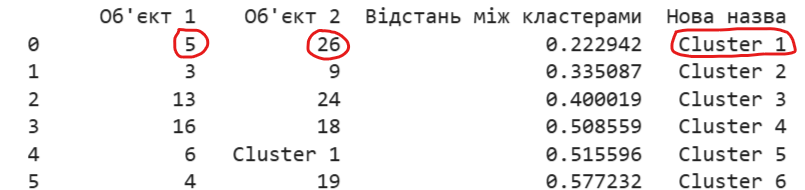

Бачимо у першому рядку об'єкти 5 і 26 об'єднуються, маючи відстань 0.222942. Це свідчить про те, що вони найбільш схожі на даному етапі. Вони об'єднуються і їх нова назва - "Cluster 1". Давайте подивимося на нашу дендограмму:

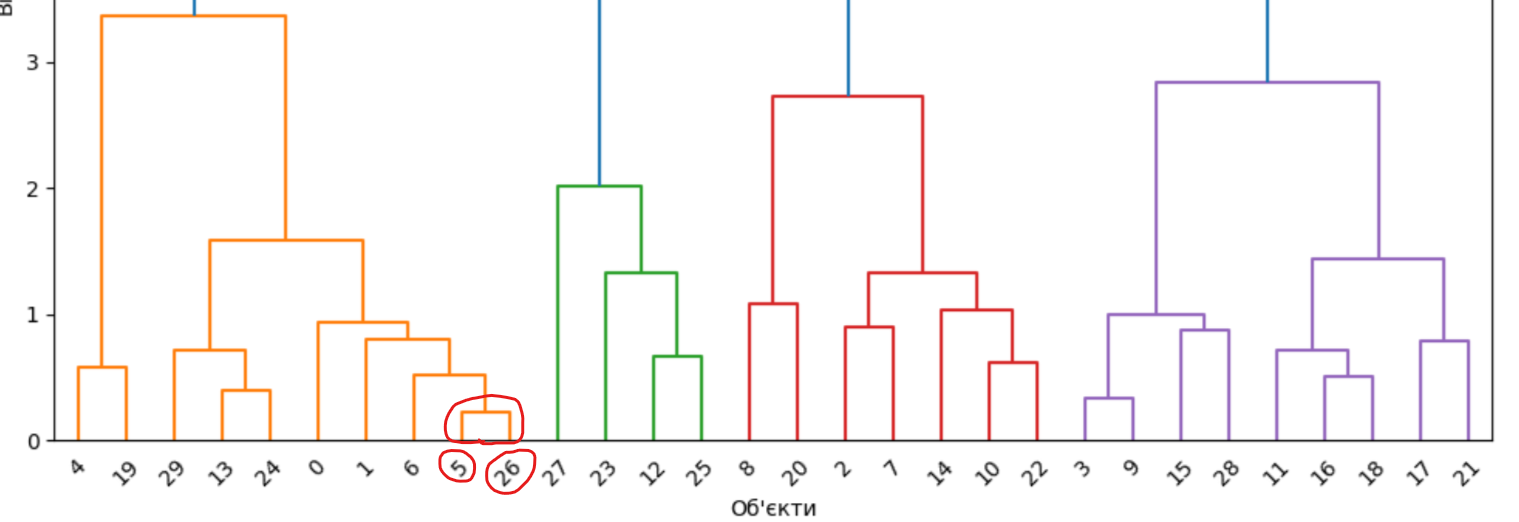

Ура! На нашій дендограммі все виглядає належним чином, але давайте ще перевіримо один момент.

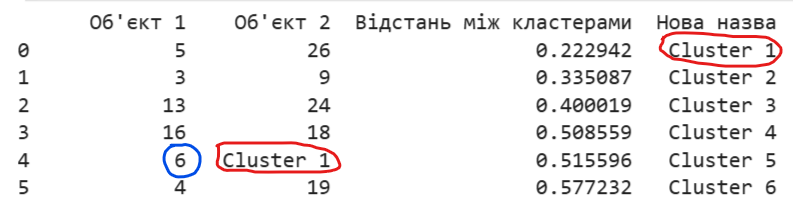

Як я казала раніше, при об'єднанні об'єктів 5 та 26 ми утворили Cluster 1. Далі ми вже бачимо, що в нас буде об'єднання Cluster 1 та 6, давайте також перевіримо це на дендограммі:

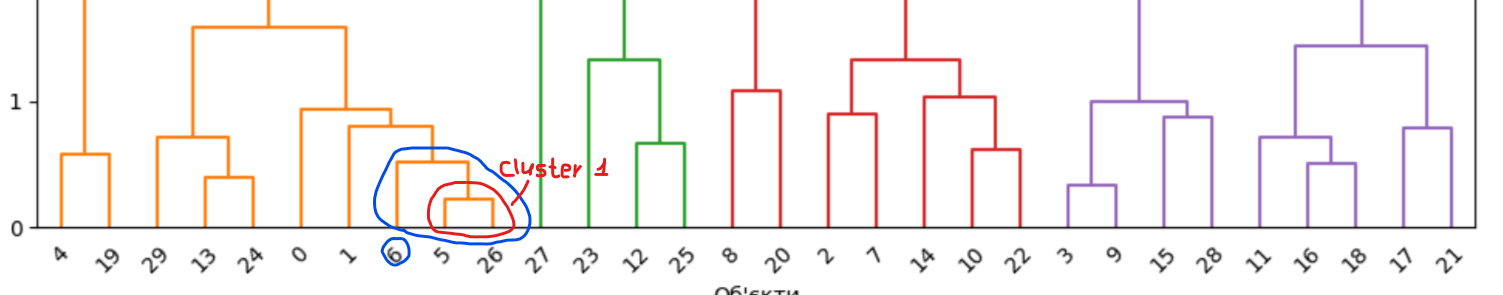

Супер! Тепер можно точно сказати, що програма працює правильно і ми розібралися із ієрархічним методом кластеризації

##***Висновок***

У цій роботі ми застосували ієрархічний метод кластеризації для аналізу даних. Спочатку обробили пропущені значення, замінивши їх середнім значенням, що забезпечило коректність результатів. Побудована дендограмма наочно продемонструвала, як об'єкти з найбільшою схожістю об'єднуються на ранніх етапах, а пізніше формуються більш складні структури.

Матриця об'єднання зафіксувала результати злиття об'єктів у нові кластери, які відображають спільні характеристики. Використовуючи метод ліктя, ми визначили оптимальну кількість кластерів для подальшого аналізу.

Таким чином, ми успішно застосували ієрархічну кластеризацію, підтвердивши її ефективність у виявленні структурних зв'язків в даних.

